In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import sklearn.datasets
import mglearn

# 결정 트리(Decision Tree)
- 분류, 회귀 문제에 널리 사용하는 모델
- 범주형 데이터에서는 '예/아니요', 연속적인 데이터에서는 '특성 i는 값 a보다 큰가?' 같은 형태로 노드를 분할해 나감
    - 분할 시, 가장 많은 정보를 포함하도록 분할함
    - 각 테스트(분할과정)는 하나의 특성에 대해서만 이루어지므로 나누어진 영역은 항상 축에 평행함
    - 규제 없이 학습할 경우 모든 노드가 순수노드가 될 때까지 즉, 끝까지 학습하기 때문에 과대적합될 위험 높음

In [3]:
# 완전한 트리(모든 리프가 순수 노드가 될 때까지 생성한 트리) 모델
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# candata
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 모델링
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Train set 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

Train set 정확도: 1.000
Test set 정확도: 0.937


- 훈련 세트의 정확도 100%, test 세트 정확도가 더 낮음 => 과대적합, 일반화 성능 비교적 낮음

## 규제
과대적합 막는 방법 (sklearn은 사전 가지치기만 지원, 사후 가지치기 지원 X)
1. 사전 가지치기
    - 트리의 최대 깊이(max_depth)
    - 리프의 최대 개수 제한(max_leaf_nodes)
    - 리프노드가 되기 위한 최소한의 샘플 개수(min_samples_leaf)
    - 노드가 분기할 수 있는 최소 샘플 개수(min_samples_split)
    - ...등
2. 사후 가지치기(가지치기)   
    - 트리를 만든 후, 데이터 포인트가 적은 노드를 삭제하거나 병합

In [4]:
# 사전 가지치기: max_depth 매개변수로 tree 최대 깊이 제한
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Train set 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

Train set 정확도: 0.988
Test set 정확도: 0.951


- 테스트 세트의 정확도가 조금 올라감

## 결정 트리 분석 / 시각화
- export_graphviz 함수
    - 그래프 저장용 텍스트 파일 포맷인 .dot 파일 만듬

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['악성','양성'], feature_names=cancer.feature_names, impurity=False, filled=True)

- 위를 통해 저장된 파일을 읽어서, graphviz 모듈을 사용해 시각화
- conda install graphviz

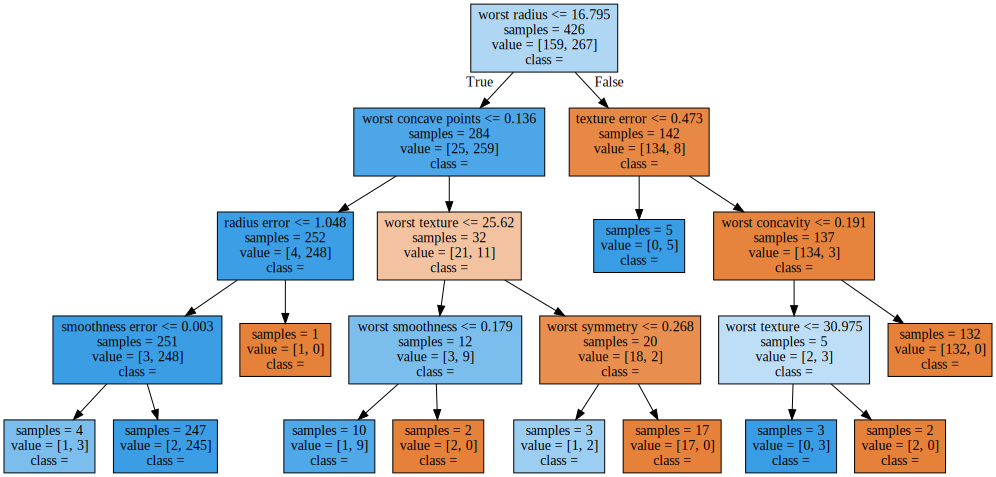

In [6]:
import graphviz

with open('tree.dot', encoding='utf-8') as f:      # encoding 'utf-8'로 해야 그래프 시각화시 오류 안남
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 특성 중요도(feature importance)
- 트리를 만드는 결정에 각 특성이 얼마나 중요한지 평가
    - 0 ~ 1 사이 숫자   (특성 중요도의 총 합은 1)
    - 0: 각 특성에 대해 전혀 사용되지 않음
    - 1: 완벽하게 타깃 클래스를 예측했다..?

In [7]:
# 특성 중요도
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [8]:
# name, importance 쌍을 특성 중요도 순으로 정렬해야 시각화 시 보기 편함
tmp = pd.DataFrame({'name':cancer.feature_names, 'importance':tree.feature_importances_}).sort_values(by='importance')
tmp

,name,importance
0,mean radius,0.000000
25,worst compactness,0.000000
23,worst area,0.000000
22,worst perimeter,0.000000
19,fractal dimension error,0.000000
18,symmetry error,0.000000
17,concave points error,0.000000
16,concavity error,0.000000
15,compactness error,0.000000
13,area error,0.000000


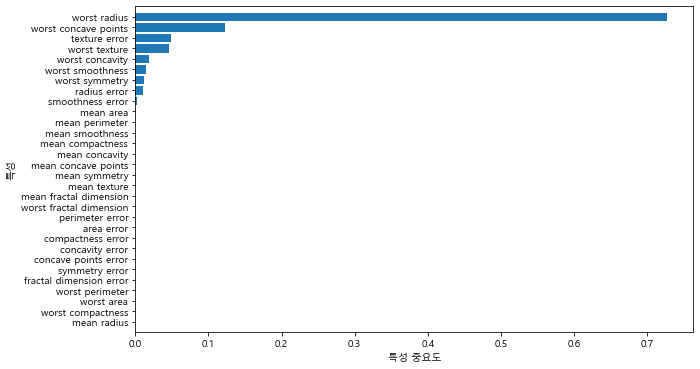

In [9]:
def plot_feature_importances_cancer(model, x, y):
    plt.figure(figsize=(10,6))
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), y, align='center')   # barh: 가로막대
    plt.yticks(np.arange(n_features), x)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree, tmp['name'], tmp['importance'])

- 첫 번째 노드에서 사용한 특성 'worst radius'가 가장 중요한 특성
- 그러나, 어떤 특성의 feature_importances_ 값이 낮다고 해서, 이 특성이 유용하지 않다는 뜻은 아님!
    - 단지 트리가 선택하지 않았을 뿐이며, 다른 특성이 동일한 정보를 지니고 있어서일 수도 있음 (tree 모델. 이모델에서만 덜 중요한 특성일 수도..!)
- 선형 모델의 계수와 달리 특성 중요도는 항상 양수이며, 특성이 어떤 클래스를 지지하는지 알 수 없음

Feature importances: [0. 1.]


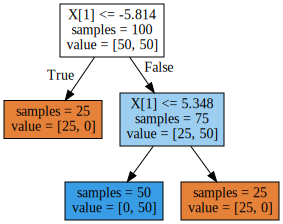

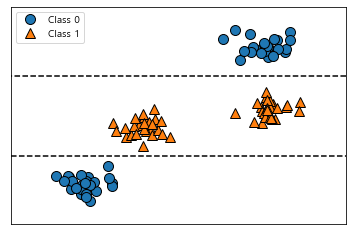

In [10]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- 특성 두 개와 클래스 두 개를 가졌었지만, 분할 시 사용된 특성은 모두 x[1]이며, x[0]은 전혀 사용되지 않음

## 외삽
- 외삽(extrapolation): 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음

Text(0, 0.5, '가격 ($/Mbyte)')

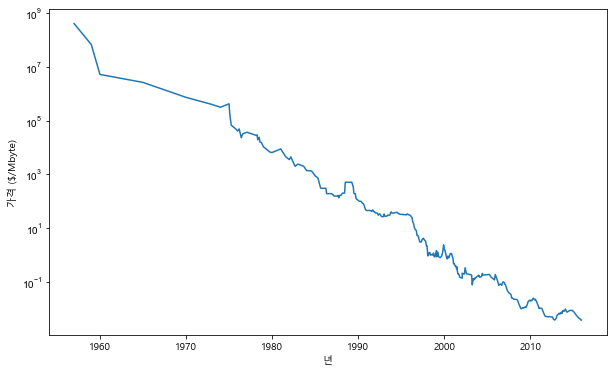

In [11]:
# 예시 - 컴퓨터 메모리 가격 동향 데이터셋
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.figure(figsize=(10,6))
plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)   
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')   # 램 1메가바이트당 가격

- y축은 log scale -> 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서, 비교적 예측하기 쉬워짐

In [12]:
# 2000년 이후 가격 예측
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
# DecisionTreeRegressor vs LinearRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측에 날짜 특성만 이용
X_train = data_train.date[:, np.newaxis]
# 로그 스케일로 변형
y_train = np.log(data_train.price)

In [13]:
X_train

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측 - 전체 기간에 대해 수행
X_all = ram_prices.date[:, np.newaxis]   # 예측 대상 전체 날짜

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일 되돌리기
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

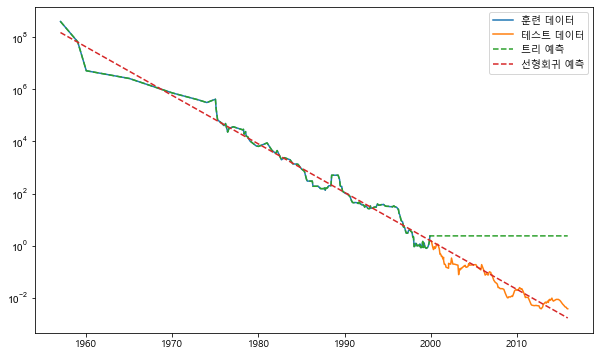

In [15]:
# 실제값과 결정트리, 선형 회귀 예측값 비교
# semilogy: semilogy는 y축에 대해 로그 스케일을 사용하여 데이터를 플로팅함(y축에 로그 배율이 있음)
plt.figure(figsize=(10,6))
plt.yticks(fontname = 'Arial')   # 지정 안하면 wraning
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')   # (x, y, [label,...])  
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측', linestyle='dashed')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측', linestyle='dashed')
plt.legend()

- 트리 모델이 훈련 데이터를 완벽히 예측함
    - 예측값과 훈련데이터 값이 똑같아, 파란색 훈련데이터 선이 트리 예측선 뒤에 가려져 보이지 않는 것
- 그러나, 가진 범위 밖 즉, 2000년 이후 데이터부터는 단순히 마지막 포인트(데이터)를 이용해 예측하는게 전부
    - 트리 예측값이 마지막 포인트(마지막 훈련 데이터 포인트)에서 쭉 직선으로 나타나는 이유임
- 트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없음 (모든 트리 기반 모델의 공통된 단점)
- 시계열 데이터에선 잘 맞지 않으나, 다른 예측 (가격이 오르거나 내릴지 예측, 클래스 분류 예측 등)에는 좋은 예측 만들 수 있음

# 결정트리 기반 앙상블
- 앙상블(ensemble) 여러 머신러닝 모델을 연결하여, 더 강력한 모델을 만드는 기법
- 랜덤 포레스트, 그레이디언트 부스팅 두 모델을 모델을 구성하는 기본 요소로 결정 트리 사용

## 랜덤 포레스트
- 결정 트리의 주요 단점인 '훈련 데이터에 과대적합되는 경향' 회피 가능 (**무작위성!**)
    - 서로 다른 방향으로 과대적합된 트리를 많이 만들면, 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있음
    - 각각의 트리는 타깃 예측을 잘 해야함 + 다른 트리와는 구별되야함
    - 데이터 포인트 무작위 선택(부트스트랩) + 특성을 무작위로 선택(max_features)
- 매개변수 튜닝을 많이 하지 않아도 (기본값 만으로도) 성능 좋음
- 데이터 스케일을 맞출 필요도 없음 (다수 특성중 한번의 노드 분할에 하나의 특성 사용하니까)
- 텍스트 데이터 같은 차원이 높고 희소한 데이터에는 잘 작동하지 않음 <- 선형모델이 더 적합함
- 선형모델 보다 많은 메모리를 사용하며, 훈련과 예측이 느림

주요 매개변수   
- `n_estimators`: 생성할 트리의 개수 (default: 10). **클 수록 좋으나, 메모리 고려해야함**
    - 값 지정 안하면, 기본값이 100으로 바뀐다는 warning 출력됨
- `n_samples`: (부트스트랩 샘플) n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출
    - 한 샘플이 여러번 중복 추출될 수 있음, 특정 데이터 포인트는 누락될 수도 있음 약 1/3 확률로
- `max_features`: (후보 특성) 각 트리 노드 훈련시 몇 개의 특성 고를지 
    - **일반적으로 기본값(auto) 쓰는게 좋음**
        - 분류에서는 sqrt(n_features) 의미
        - 회귀에서는 n_features 의미
    - 후보 특성을 고르는 것은 매 노드마다 반복됨 -> 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트 생성
        - 값을 크게하면, 랜덤 포레스트 트리들을 매우 비슷해지며, 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것
        - 값을 작게하면, 트리들을 많이 달라지고, 각 데이터에 맞추기 위해 깊이가 깊어지게 됨   
        

규제 매개변수           
- max_depth 등 사전 가지치기 매개변수 있음

기타 매개변수
- n_jobs=-1 : 컴퓨터의 모든 코어 사용
- random_state값 지정해야함(랜덤 포레스트 모델은 말 그대로 랜덤 하기에, 지정하지 않으면 전혀 다른 모델 만들어냄)

최종예측   
- 회귀: 예측 값들의 평균
- 분류: 각 트리별로 class 확률 제공 -> 트리들이 예측한 class별 확률을 평균내어, 가장 높은 확률을 가진 클래스가 예측값이 됨

### two_moon data set

In [16]:
# two_moon data set - 5개의 tree로 이루어진 랜덤 포레스트 적용
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)   # 생성할 트리 개수: 5개
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [18]:
# 만들어진 트리들은 estimators_ 속성에 저장됨
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

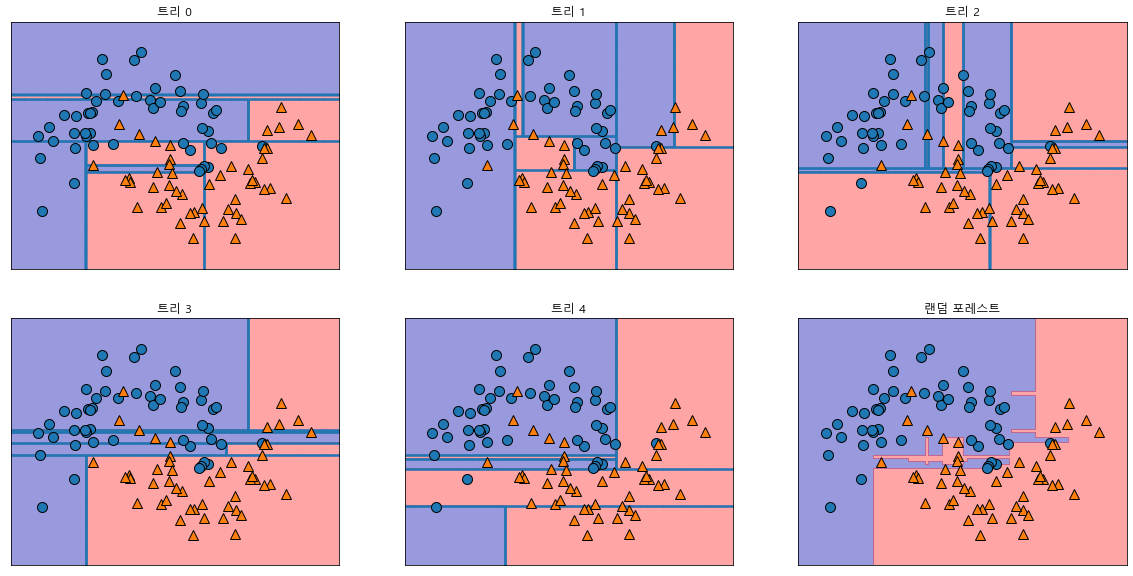

In [19]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'트리 {i}')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

- 부트스트랩 샘플링으로 5개의 트리가 만든 결정 경계는 확연하게 다르며, 각 트리는 불완전함

### cancer data set

In [20]:
# 유방암 데이터셋 - 100개의 tree로 이루어진 랜덤 포레스트 적용
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


- 랜덤 포레스트는 기본 설정으로도 좋은 결과를 만들어 줄 때가 많음

### 특성 중요도 시각화
- 랜덤 포레스트의 특성 중요도: 각 트리의 특성 중요도를 취합하여 계산한 것 -> 하나의 트리에서 제공하는 것 보다 더 신뢰할만 함

In [21]:
# name, importance 쌍을 특성 중요도 순으로 정렬해야 시각화 시 보기 편함
tmp = pd.DataFrame({'name':cancer.feature_names, 'importance':forest.feature_importances_}).sort_values(by='importance')
tmp

,name,importance
9,mean fractal dimension,0.002827
14,smoothness error,0.003606
15,compactness error,0.004321
16,concavity error,0.004488
18,symmetry error,0.004606
11,texture error,0.006078
19,fractal dimension error,0.006271
17,concave points error,0.006575
8,mean symmetry,0.006577
4,mean smoothness,0.007691


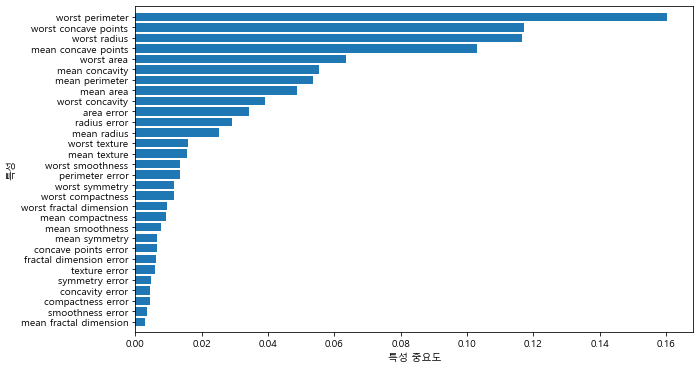

In [22]:
plot_feature_importances_cancer(forest, tmp['name'], tmp['importance'])

- 단일 트리 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 가짐
- 가장 많은 정보를 가진 특성으로 'worst perimeter' 선택

## 그레디언트 부스팅 회귀 트리
- 회귀, 분류 모드 사용 가능 (둘다 회귀 트리 기반)
    - GradientBoostingClassifier, GradientBoostingRegressor
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리 생성
- 무작위성 없음. 대신, **강력한 사전 가지치기** 사용 
    - 보통 1 ~ 5 정도의 깊지 않은 트리 사용 -> 메모리 적게 사용 + 예측 빠름
    - 트리가 많이 추가될 수록 성능이 좋아짐
- 근본 아이디어: 얕은 트리 같은 간단한 모델(약한 학습기)를 많이 연결하는 것

단점
- 매개변수를 잘 조정해야함
- 훈련 시간이 김
- 희소한 고차원 데이터에 잘 작동하지 않음

장점
- 다른 트리기반 모델처럼 특성 스케일 조정 필요 없음

중요 매개변수
- **n_estimators**: 트리 개수
    - 값을 키우면 앙상블에 트리가 더 많이 추가되어, 모델의 복잡도가 커짐 (과대적합 될 가능성이 높아짐)
- **learning_rage**: 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어
    - 학습률이 크면 트리는 보정을 강하게함 -> 복잡한 모델 만듬
    - learning_rate를 낮추면 비슷한 복잡도를 만들기 위해 더 많은 트리를 추가해야함 (n_estimators를 크게해야)
- 따라서, n_estimators를 가용 시간&메모리 한도에서 맞추고, learning_rate를 찾는 것이 관례

조기 종료
- **n_iter_no_change**: n회 반복 동안 검증 점수가 향상되지 않으면 훈련 종료
    - 기본값: None (조기 종료 사용 X)
- **validation_fraction**: 설정 비율만큼을 검증 데이터로 사용
    - 기본값: 0.1     
- n_iter_no_change 반복 동안 검증 점수가 향상되지 않으면 훈련이 종료됨

규제 매개변수
- 사전 가지치기 매개변수 들(max_depth, max_leaf_nodes,...)
- 통상적으로 max_depth를 매우 작게 설정하며, 깊이가 5보다 깊어지지 않게 함

In [23]:
# 유방암 데이터셋
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


- 훈련 세트 정확도가 100%로 과대적합된 것 같음..

In [25]:
# 규제(모델 복잡도 감소시키기) - max_depth 줄이기
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [26]:
# 규제(모델 복잡도 감소시키기) - learning_rate 낮추기
gbrt = GradientBoostingClassifier(learning_rate=0.01 ,random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


### 특성 중요도 시각화

In [27]:
# 트리를 100개나 사용했으므로, 깊이가 1개 밖에 안되어도, 모든 트리를 분석하긴 어려움
gbrt = GradientBoostingClassifier(max_depth=1, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=0)

In [28]:
# name, importance 쌍을 특성 중요도 순으로 정렬해야 시각화 시 보기 편함
tmp = pd.DataFrame({'name':cancer.feature_names, 'importance':gbrt.feature_importances_}).sort_values(by='importance')
tmp

,name,importance
0,mean radius,0.000000
25,worst compactness,0.000000
2,mean perimeter,0.000000
3,mean area,0.000000
4,mean smoothness,0.000000
5,mean compactness,0.000000
19,fractal dimension error,0.000000
9,mean fractal dimension,0.000000
10,radius error,0.000000
12,perimeter error,0.000000


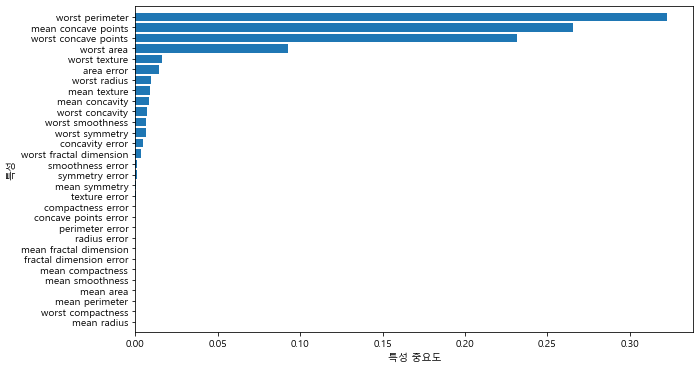

In [29]:
plot_feature_importances_cancer(gbrt, tmp['name'], tmp['importance'])

- 랜덤 포레스트와 비슷한 특성을 강조하고 있음
- 하지만, 랜덤 포레스트에 비해 일부 특성을 완전히 무시하고 있음 (일부 특성의 중요도가 훨씬 두드러져 나타남)

랜덤 포레스트 vs 그레이디언트 부스팅
- 보통 더 안정적인 랜덤 포레스트를 먼저 적용하곤 함
- 예측 시간이 중요하거나, 마지막 성능까지 쥐어짜낼 때 그레이디언트 부스팅을 사용하면 도움이 됨

대규모 데이터에 그레이디언트 부스팅을 적용하려면 **xgboost**를 검토해보는 것이 좋음
- 그레이디언트 부스팅보다 구현이 빠르며, 튜닝도 더 쉬움

# 앙상블

In [38]:
# 데이터 준비 two_moons, cancer
# from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [40]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

## 배깅(Bagging)
- Booststrap aggregating의 줄임말
- 중복을 허용한 랜덤 샘플링인 부트스트랩 샘플로 만든 훈련 세트로, 분류기를 각기 다르게 학습시킴

In [43]:
# 배깅 사용해서 로지스틱 회귀 모델 100개 훈련하여 앙상블
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# oob_score=True -> 부트스트래핑에 포함되지 않은 샘플을 기반으로, 훈련 모델 평가 (테스트 세트 성능 어느정도 짐작 가능)!
## -> OOB(out of bag) 오차
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)  # cancer data set

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [47]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.937
OOB 샘플의 정확도: 0.944


In [48]:
# 결정 트리로 배깅 수행하는 것보다는 랜덤 포레스트 사용하는게 더 편리하지만..
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)  # 5개만
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

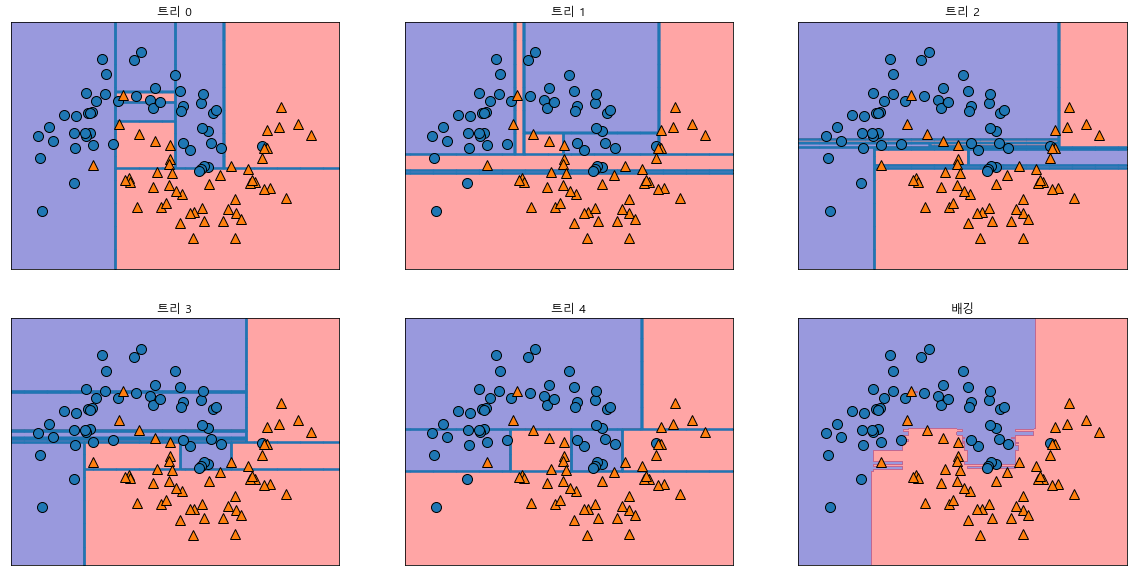

In [50]:
# 결정 경계 시각화
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('배깅')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

- 랜덤 포레스트 결정 경계와 유사

In [52]:
# 100개로 늘려서 확인
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [53]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


## 엑스트라 트리(Extra-Trees)
- 랜덤 포레스트와 비슷하지만, 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음
- DecisionTreeClassifier(splitter='random') 사용   (랜덤 포래스트는 splitter='best' 사용)
- 부트스트랩 샘플링 사용 X
- 이렇게 무작위 성을 증가시키면, 편향이 늘어나지만 분산이 감소
- 각 트리가 만든 확률값 평균하여 예측

In [55]:
# two_moons data set에 적용
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

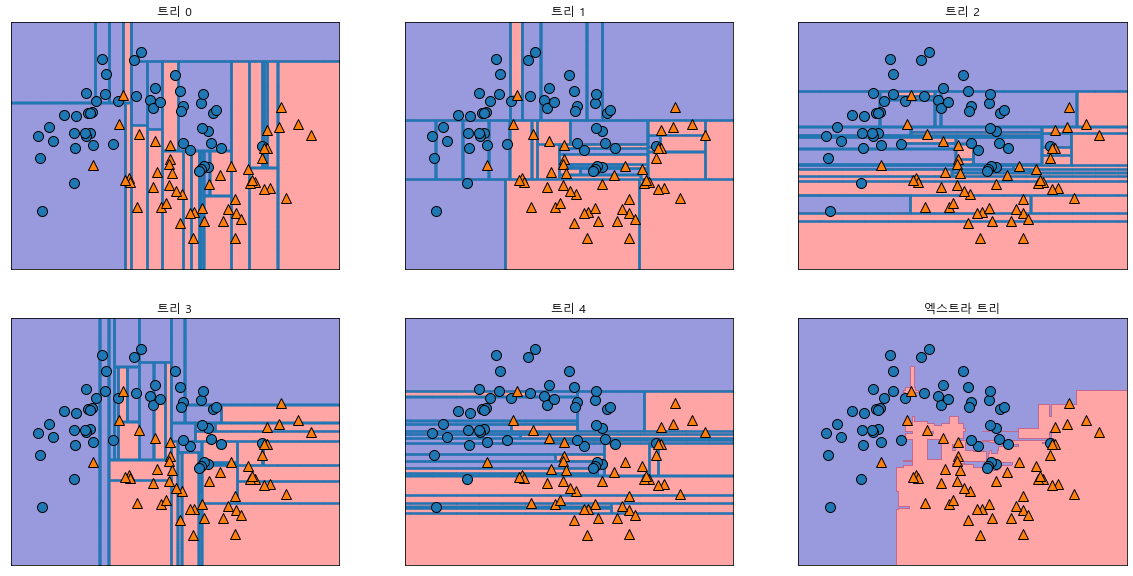

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

- 랜덤 분할 후, 회선의 분할을 찾기 때문에 개별 트리의 결정 경계가 더 복잡해짐
- 앙상블한 엑스트라 트리의 결정 경계는 비교적 안정적

In [61]:
# 트리 100개로 다시 학습 후 확인 - cancer data set
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

ExtraTreesClassifier(n_jobs=-1, random_state=0)

In [63]:
print('훈련 세트 정확도: {:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


- 랜덤 포레스트와 비슷한 성능을 냄

- 하지만, 엑스트라 트리는 무작위 분할 때문에 일반화 성능을 높이려면 많은 트리를 만들어야함
- 이때문에 일반적으로 랜덤 포레스트가 더 선호됨!

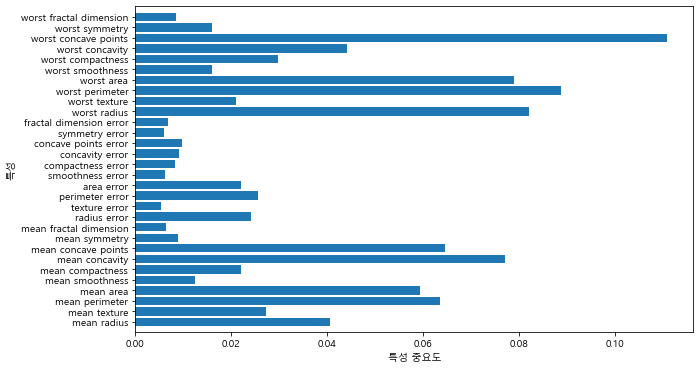

In [69]:
# 중요도 시각화
n_features = cancer.data.shape[1]
plt.figure(figsize=(10,6))
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

- 랜덤 포레스트와 비슷한 특성 중요도를 보임

## 에이다부스트(AdaBoost)
- 그레디언트 부스팅처럼 약한 학습기 사용
- 이전 모델이 잘못 분류한 샘플에 가중치를 높여, 다음 모델을 훈련
- 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택

- AdaBoostClassifier는 기본값으로 DecisionTreeClassifier(max_depth=1) 사용
- AdaBoostRegressor는 기본값으로 DecisionTreeRegressor(max_depth=3) 사용
- base_esimator 매개변수로 다른 모델 지정 가능
- 그레디언트 부스팅 처럼 순차적으로 학습(n_jobs 지원 X)

In [70]:
# two_moons data set
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

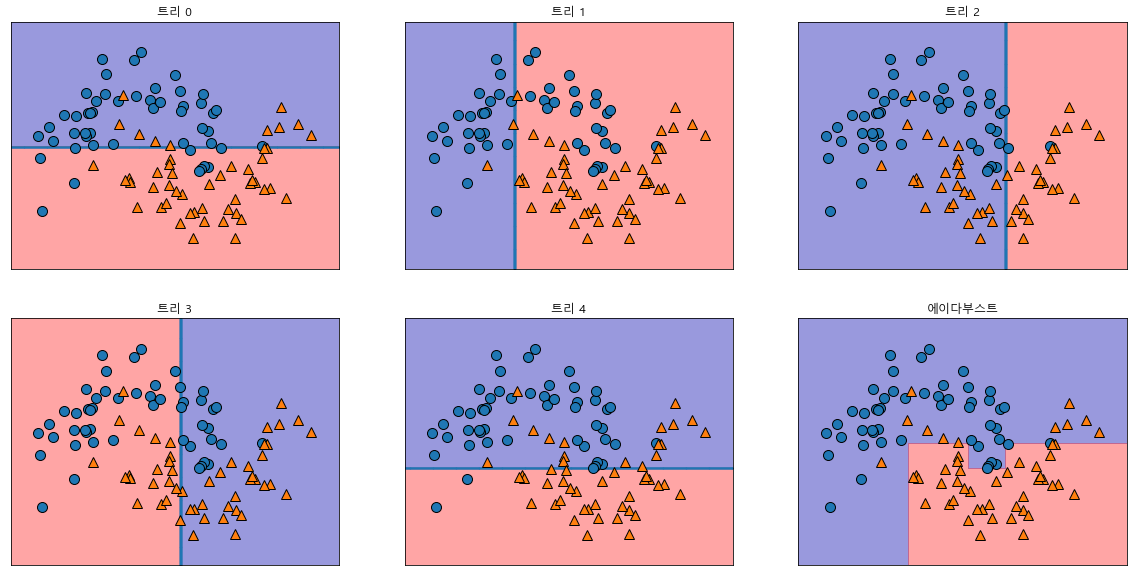

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title(f'트리 {i}')
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('에이다부스트')
mglearn.discrete_scatter(Xm[:, 0], Xm[:,1], ym)
plt.show()

- 기본값인 깊이가 1인 결정 트리를 사용했기 때문에, 각 트리의 결정 경계가 직선 하나임
- 앙상블된 결정 경계도 다른 모델에 비해 비교적 단순함

In [75]:
# cancer data set
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [76]:
print('훈련 세트 정확도: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


- 얕은 트리(약한 학습기들)를 앙상블했기 때문에, 일반화 성능이 조금 더 향상됨

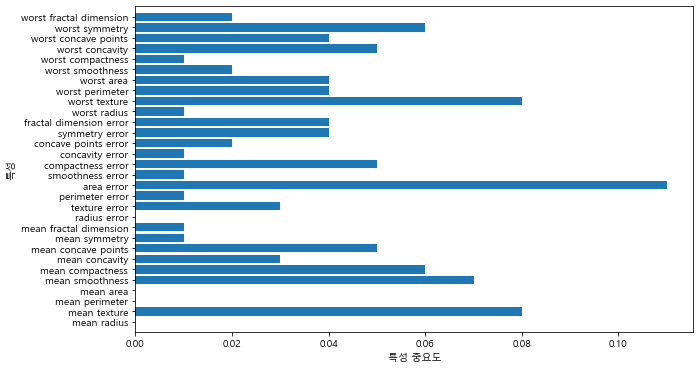

In [79]:
# 중요도 확인
plt.figure(figsize=(10,6))
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

- 다른 모델에서 부각되지 않았던 'area error' 특성을 크게 강조하고 있음